In [40]:
#!pip uninstall -y xgboost

In [41]:
#!pip install xgboost

In [42]:
import pandas as pd #load/manipulate data and for One Hot Encoding
import numpy as np #calc mean and std dev
import xgboost as xgb#XBGoost module
from sklearn.model_selection import train_test_split #split data into train/test
from sklearn.model_selection import GridSearchCV#cross validation
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer#for scoring
from sklearn.metrics import confusion_matrix #create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix #draw confusion matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\jacob\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [4]:
#read in the data
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
#drop cols that are not useful
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [6]:
#check some of the other columns to see the unique vals and determine if they will help us in  a prediction
df['Count'].unique()

array([1], dtype=int64)

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df['State'].unique()

array(['California'], dtype=object)

In [9]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [10]:
#drop columns with one value that wont help us
df.drop(['CustomerID','Count','Country','State','Lat Long'], axis = 1, inplace = True)
df.head ()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [11]:
#although its fone to have black space between city names for xgboost and classification but if we want to draw the tree we need to remove it
df['City'] = df['City'].str.replace(' ', '_', regex=True)
df.head()


,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [12]:
df['City'].unique()[:100]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra', 'Pico_Rivera', 'Avalon', 'Harbor_City',
       'Lakewood', 'Los_Alamitos', 'San_Pedro', 'Carson', 'Long_Beach',
       'Altadena', 'Monrovia', 'Sierra_Madre', 'Tujunga', 'Pasadena',
       'Glendale', 'Canoga_Park', 'Mission_Hills', 'Santa_Clarita',
       'Sun_Valley', 'Stevenson_Ranch', 'Panorama_City', 'Van_Nuys',
       'Burbank', 'North_Hollywood', 'Covina', 'El_Monte', 'La_Puente',
       'Rowland_Heights', 'Ontario', 'Pomona', 'Rosemead', 'San_Dimas',
       'West_Covina', 'Alhambra', 'Alpine', 'Bonita', 'Boulevard',
       'Guatay', 'Jacumba', 'Mount_Laguna', 'Borrego_Springs', 'Carlsbad',
       'Del_Mar', 'El_Cajon', 'Escondido', 'Oceanside', 'Pala',
       'Palomar_Mountain', 'Pauma_Valley', 'Ranchita', 'Valley_Center',
       'San_Diego', 'Indio', 'Indian_Wells', 'Palm_Desert',
       'Desert_Hot_Springs', 'Hol

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [14]:
#there seems to be whitespace in the column names so lets replace it 
df.columns = df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


We more or less have our final DF so we can now check for missing data.

XGBoost has a default behavior for missing data. So all we have to do is set missing values to 0. Even if there are "0" values in the data this will be fine.

In [15]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [16]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
#total charges seems to be numeric values but has an object type
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [18]:
#if we try to convert total charges to nueric, it fails so we know there are blank spaces in the data
#df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

#Error reads -> ValueError: Unable to parse string " " at position 2234

In [19]:
#check how many rows have missing values
len(df.loc[df['Total_Charges'] == ' '])

11

In [20]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [21]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [22]:
#total changes are now 0 for all tenure months = 0
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [23]:
#now that we've fixed the missing data we need to convert total charges to numeric so it can be used in XGBoost
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [24]:
#replace all empty space in the df with an underscore like we did for city
df.replace(' ','_',regex=True, inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [25]:
#seperate out target and features
X = df.drop('Churn_Value', axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [26]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

Now that we've split the data we can do the one hot encoding

In [27]:
X_encoded = pd.get_dummies(X, columns=['City',
                                      'Gender',
                                      'Senior_Citizen',
                                      'Partner',
                                      'Dependents',
                                      'Phone_Service',
                                      'Multiple_Lines',
                                      'Internet_Service',
                                      'Online_Security',
                                      'Online_Backup',
                                      'Device_Protection',
                                      'Tech_Support',
                                      'Streaming_Movies',
                                      'Contract',
                                      'Paperless_Billing',
                                      'Payment_Method'])

# Convert all boolean-like or categorical columns to integer
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Streaming_TV,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33,-118,2,0,53,108,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34,-118,2,0,70,151,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34,-118,8,0,99,820,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34,-118,28,0,104,3046,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34,-118,49,0,103,5036,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [28]:
y.unique()

array([1, 0], dtype=int64)

Before we split the data or build a model lets check the imbalance of the data when it comes to people who did and did not churn

In [29]:
sum(y)/len(y)

0.2653698707936959

So only about 27% of the people in the data left the company. So when it comes to train_test_split we will use stratification to maintain the same percentage of people who left the company in both training and testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=42)

In [31]:
#we see the same proportions are in the testing and training
sum(y_train)/len(y_train)

0.2654297614539947

In [32]:
#we see the same proportions are in the testing and training
sum(y_test)/len(y_test)

0.26519023282226006

In [33]:
#pip install --upgrade xgboost
print(xgb.__version__)

3.0.0


In [44]:
#lets build the model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, missing=np.nan,
                           early_stopping_rounds=10, eval_metric='aucpr')

clf_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-aucpr:0.64895
[1]	validation_0-aucpr:0.64947
[2]	validation_0-aucpr:0.65090
[3]	validation_0-aucpr:0.65076
[4]	validation_0-aucpr:0.65114
[5]	validation_0-aucpr:0.65233
[6]	validation_0-aucpr:0.65893
[7]	validation_0-aucpr:0.65661
[8]	validation_0-aucpr:0.65820
[9]	validation_0-aucpr:0.65957
[10]	validation_0-aucpr:0.65893
[11]	validation_0-aucpr:0.65734
[12]	validation_0-aucpr:0.65826
[13]	validation_0-aucpr:0.65785
[14]	validation_0-aucpr:0.65814
[15]	validation_0-aucpr:0.65853
[16]	validation_0-aucpr:0.65381
[17]	validation_0-aucpr:0.65379
[18]	validation_0-aucpr:0.65270


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

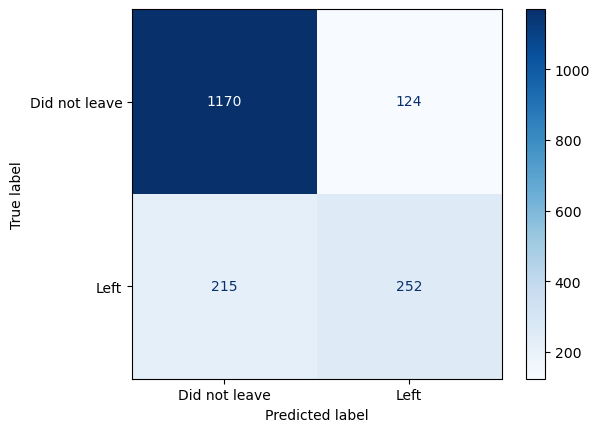

In [45]:
# Get confusion matrix
cm = confusion_matrix(y_test, clf_xgb.predict(X_test))

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not leave', 'Left'])

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')

Out of the 1294 people that did leave the company we were able to guess 1170 correctly. So about 90% accurate. However out of the 467 people that did leave the company we were only able to guess about 50% of them correctly. Part of the problem is how unbalanced our dataset was.

XGBoost has a parameter "scale_pos_weight" that helps with the imbalanced data. Baisically it helps the model to pay more attention to the minority class. 

XGBoost has a lot of parameters so we can use GirdSearchCV(). We will specify many potential values for the hyperparameters and use GridSearchCV() to test all possible combinations

In [53]:
# #round 1 of params
# param_grid = {
#     'max_depth': [3,4,5],
#     'learning_rate': [.1,.01,.05],
#     'gamma': [0,.25,1],
#     'reg_lambda': [0,1,10],
#     'scale_pos_weight': [1,3,5]
# }

#round 2 of params
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [.1,.01,.05],
    'gamma': [0,.25,1],
    'reg_lambda': [0,1,10],
    'scale_pos_weight': [1,3,5]
}

optional_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                               random_state=42,
                               subsample=.9,#help with overfitting and speed
                               colsample_bytree=.5,#help with overfitting and speed
                               early_stopping_rounds=10, 
                                eval_metric='aucpr',
                               missing=np.nan),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

optional_params.fit(X_train,y_train,
                    eval_set=[(X_test,y_test)],
                    verbose=False)
print(optional_params.best_params_)


C:\Users\jacob\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [51]:
#lets build the model with the new parameter values
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, 
                            missing=np.nan, early_stopping_rounds=10, 
                            eval_metric='aucpr', gamma=.25,
                           learning_rate=.05, max_depth=5,
                           reg_lambda=10, scale_pos_weight=3,
                           subsample=.9,colsample_bytree=.5)

clf_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-aucpr:0.49616
[1]	validation_0-aucpr:0.58398
[2]	validation_0-aucpr:0.59841
[3]	validation_0-aucpr:0.61918
[4]	validation_0-aucpr:0.62682
[5]	validation_0-aucpr:0.62383
[6]	validation_0-aucpr:0.62861
[7]	validation_0-aucpr:0.63136
[8]	validation_0-aucpr:0.63438
[9]	validation_0-aucpr:0.63512
[10]	validation_0-aucpr:0.63737
[11]	validation_0-aucpr:0.63742
[12]	validation_0-aucpr:0.63703
[13]	validation_0-aucpr:0.63620
[14]	validation_0-aucpr:0.63700
[15]	validation_0-aucpr:0.63590
[16]	validation_0-aucpr:0.63604
[17]	validation_0-aucpr:0.63655
[18]	validation_0-aucpr:0.63329
[19]	validation_0-aucpr:0.63507
[20]	validation_0-aucpr:0.63493
[21]	validation_0-aucpr:0.63478
[22]	validation_0-aucpr:0.63484
[23]	validation_0-aucpr:0.63512
[24]	validation_0-aucpr:0.63389
[25]	validation_0-aucpr:0.63965
[26]	validation_0-aucpr:0.63999
[27]	validation_0-aucpr:0.65010
[28]	validation_0-aucpr:0.64959
[29]	validation_0-aucpr:0.64996
[30]	validation_0-aucpr:0.64759
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

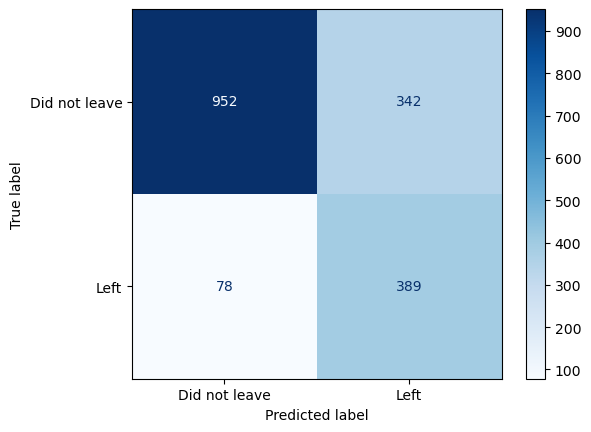

In [52]:
# Get confusion matrix
cm = confusion_matrix(y_test, clf_xgb.predict(X_test))

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not leave', 'Left'])

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')

we gave up some accuracy when predicting customers who dont churn but have significantly increased accuracy for those who do churn.
73% for non chrun and 83% for those who left
